<a href="https://colab.research.google.com/github/erdem-tuncer/Quick_Look/blob/main/Copy_of_Initial_EDA_4_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data set 1 and initial clean

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df = pd.read_excel('/content/drive/MyDrive/GDL - Cohort 17 Collaboration Drive/Project Files/All Vue Tenants - Single Report - 02-27-22.xlsx')
df = pd.read_csv('/content/drive/MyDrive/GDL - Cohort 17 Collaboration Drive/Project Files/All Vue Tenants - Single Report - 02-27-22_Work_KPIs.csv') # faster to load csv JH

In [ ]:
df.head()

Company ID  Worker ID EmployeeTitle     LocationName ActivityDate  \
0          22      10063          Data  CHENNAI SHRIRAM       28-Feb   
1          22      18364    Production       Coimbatore       28-Feb   
2          22      10068          Data  CHENNAI SHRIRAM       28-Feb   
3          22      20558         Voice       Coimbatore       28-Feb   
4          22      18429           NaN       Coimbatore       28-Feb   

  FirstOnPcTime  LastOnPcTime  Hours Between First and Last  On PC Hours  \
0  2/28/22 8:39  2/28/22 9:04                          0.41         0.31   
1  2/28/22 4:36  2/28/22 8:56                          4.34         4.34   
2  2/28/22 0:00  2/28/22 0:15                          0.25         0.24   
3  2/28/22 7:33  2/28/22 9:03                          1.50         1.23   
4  2/28/22 8:49  2/28/22 9:04                          0.24         0.23   

   Meeting Hours  Private Time Hours  Unaccounted Hours  CoreHours  \
0            0.0                0.00               0.10       0.31   
1            0.0                0.00               0.00       4.19   
2            0.0                0.00               0.00       0.24   
3            0.0                0.00               0.26       1.23   
4            0.0                0.01               0.00       0.23   

   Focus Hours Utilization %  Break Hours  Number of Breaks  
0         0.00         3.88%         0.10               1.0  
1         4.19        54.25%         0.00               0.0  
2         0.00         3.00%         0.00               0.0  
3         1.23        15.38%         0.25               1.0  
4         0.00         2.88%         0.00               0.0

head is just to get an idea of what the data looks like before we look at the stats on it

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048451 entries, 0 to 1048450
Data columns (total 17 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Company ID                    1048451 non-null  int64  
 1   Worker ID                     1048451 non-null  int64  
 2   EmployeeTitle                 724627 non-null   object 
 3   LocationName                  1048451 non-null  object 
 4   ActivityDate                  1048451 non-null  object 
 5   FirstOnPcTime                 1043981 non-null  object 
 6   LastOnPcTime                  1043981 non-null  object 
 7   Hours Between First and Last  1048451 non-null  float64
 8   On PC Hours                   1048451 non-null  float64
 9   Meeting Hours                 1048451 non-null  float64
 10  Private Time Hours            1048451 non-null  float64
 11  Unaccounted Hours             1048451 non-null  float64
 12  CoreHours                   

Looking at the info we see that employee title is the only field with significant missing data, which is good. There are a few null values in FirstOnPcTime and LastOnPcTime, but it's only about .005% of the values. However, we do also see the `LastOnPcTime` and `FirstOnPcTime` are objects when they should be datetime looking at the data printed from the head() function. The `Utilization %` column also represented as object which can be converted to numeric by getting rid of %. Some of the column names have spaces and some are in camelcase. To have uniform representation, we convert all column names to camelcase.
(Notes update AG)

In [ ]:
df.columns = df.columns.str.replace(' ', '') # get all columns in CamelCase JH

# df['LastOnPcTime'] = pd.to_datetime(df['LastOnPcTime'], format="%Y-%m-%d %H:%M:%S", errors='coerce')

df['FirstOnPcTime'] = pd.to_datetime(df['LastOnPcTime'], format="%m/%d/%y %H:%M", errors='coerce') # get dates in correct format JH
df['LastOnPcTime'] = pd.to_datetime(df['LastOnPcTime'], format="%m/%d/%y %H:%M", errors='coerce') # JH
df['Utilization%'] = df["Utilization%"].str.rstrip("%") # get Utilization as number, not string with '%' JH
df['Utilization%'] = pd.to_numeric(df['Utilization%']) # JH

# AG: split the cells to group column name/type conversion

Had to put in to coerce the errors because there are some dates that are in the year 2336 or something like that and pandas has issues with date ranges over 500 years or something around there if I remember correctly, so this is going to convert those to NaT. We'll need to address this somehow.

Let us do the data profiling after this type conversion.

In [ ]:
display(df.describe())
display(df.head())
display(df.info())

CompanyID      WorkerID  HoursBetweenFirstandLast     OnPCHours  \
count  1.048451e+06  1.048451e+06              1.048451e+06  1.048451e+06   
mean   2.420183e+01  9.987722e+03              1.057232e+01  5.343858e+00   
std    1.165501e+01  6.182584e+03              6.989480e+00  3.019961e+00   
min    1.000000e+00  8.000000e+00              0.000000e+00 -3.380000e+00   
25%    1.700000e+01  3.830000e+03              8.440000e+00  3.150000e+00   
50%    2.200000e+01  1.030300e+04              9.810000e+00  5.600000e+00   
75%    3.700000e+01  1.543100e+04              1.261000e+01  7.460000e+00   
max    4.800000e+01  2.174200e+04              4.823350e+03  3.393100e+02   

       MeetingHours  PrivateTimeHours  UnaccountedHours     CoreHours  \
count  1.048451e+06      1.048451e+06      1.048451e+06  1.048451e+06   
mean   2.053626e-01      4.870466e-01      2.636076e+00  4.048980e+00   
std    6.922477e-01      4.825078e+00      2.194926e+00  2.760899e+00   
min   -1.040000e+00     -1.250000e+00      0.000000e+00  0.000000e+00   
25%    0.000000e+00      0.000000e+00      8.900000e-01  1.780000e+00   
50%    0.000000e+00      9.000000e-02      2.290000e+00  3.950000e+00   
75%    0.000000e+00      4.500000e-01      3.960000e+00  5.930000e+00   
max    7.711000e+01      4.823430e+03      2.066000e+01  3.069200e+02   

         FocusHours  Utilization%    BreakHours  NumberofBreaks  
count  1.048451e+06  1.048451e+06  1.048451e+06    1.048451e+06  
mean   2.793129e+00  6.936774e+01  4.470599e+00    9.375191e+00  
std    2.797449e+00  3.845243e+01  4.347940e+00    6.511768e+00  
min    0.000000e+00 -3.600000e+01  0.000000e+00    0.000000e+00  
25%    0.000000e+00  4.188000e+01  1.530000e+00    5.000000e+00  
50%    2.190000e+00  7.338000e+01  3.130000e+00    8.000000e+00  
75%    4.650000e+00  9.600000e+01  5.780000e+00    1.300000e+01  
max    7.172900e+02  5.205250e+03  3.225000e+01    1.130000e+02

CompanyID  WorkerID EmployeeTitle     LocationName ActivityDate  \
0         22     10063          Data  CHENNAI SHRIRAM       28-Feb   
1         22     18364    Production       Coimbatore       28-Feb   
2         22     10068          Data  CHENNAI SHRIRAM       28-Feb   
3         22     20558         Voice       Coimbatore       28-Feb   
4         22     18429           NaN       Coimbatore       28-Feb   

        FirstOnPcTime        LastOnPcTime  HoursBetweenFirstandLast  \
0 2022-02-28 09:04:00 2022-02-28 09:04:00                      0.41   
1 2022-02-28 08:56:00 2022-02-28 08:56:00                      4.34   
2 2022-02-28 00:15:00 2022-02-28 00:15:00                      0.25   
3 2022-02-28 09:03:00 2022-02-28 09:03:00                      1.50   
4 2022-02-28 09:04:00 2022-02-28 09:04:00                      0.24   

   OnPCHours  MeetingHours  PrivateTimeHours  UnaccountedHours  CoreHours  \
0       0.31           0.0              0.00              0.10       0.31   
1       4.34           0.0              0.00              0.00       4.19   
2       0.24           0.0              0.00              0.00       0.24   
3       1.23           0.0              0.00              0.26       1.23   
4       0.23           0.0              0.01              0.00       0.23   

   FocusHours  Utilization%  BreakHours  NumberofBreaks  
0        0.00          3.88        0.10             1.0  
1        4.19         54.25        0.00             0.0  
2        0.00          3.00        0.00             0.0  
3        1.23         15.38        0.25             1.0  
4        0.00          2.88        0.00             0.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048451 entries, 0 to 1048450
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   CompanyID                 1048451 non-null  int64         
 1   WorkerID                  1048451 non-null  int64         
 2   EmployeeTitle             724627 non-null   object        
 3   LocationName              1048451 non-null  object        
 4   ActivityDate              1048451 non-null  object        
 5   FirstOnPcTime             1043980 non-null  datetime64[ns]
 6   LastOnPcTime              1043980 non-null  datetime64[ns]
 7   HoursBetweenFirstandLast  1048451 non-null  float64       
 8   OnPCHours                 1048451 non-null  float64       
 9   MeetingHours              1048451 non-null  float64       
 10  PrivateTimeHours          1048451 non-null  float64       
 11  UnaccountedHours          1048451 non-null  float6

None

In [ ]:
df.drop(df.index[df['Utilization%'] < 0], inplace = True) # drop 1 row with negative Utilization JH
df.describe()

CompanyID      WorkerID  HoursBetweenFirstandLast     OnPCHours  \
count  1.048450e+06  1.048450e+06              1.048450e+06  1.048450e+06   
mean   2.420185e+01  9.987732e+03              1.057232e+01  5.343867e+00   
std    1.165500e+01  6.182580e+03              6.989482e+00  3.019950e+00   
min    1.000000e+00  8.000000e+00              0.000000e+00  0.000000e+00   
25%    1.700000e+01  3.830000e+03              8.440000e+00  3.150000e+00   
50%    2.200000e+01  1.030300e+04              9.810000e+00  5.600000e+00   
75%    3.700000e+01  1.543100e+04              1.261000e+01  7.460000e+00   
max    4.800000e+01  2.174200e+04              4.823350e+03  3.393100e+02   

       MeetingHours  PrivateTimeHours  UnaccountedHours     CoreHours  \
count  1.048450e+06      1.048450e+06      1.048450e+06  1.048450e+06   
mean   2.053623e-01      4.870470e-01      2.636077e+00  4.048979e+00   
std    6.922480e-01      4.825080e+00      2.194926e+00  2.760900e+00   
min   -1.040000e+00     -1.250000e+00      0.000000e+00  0.000000e+00   
25%    0.000000e+00      0.000000e+00      8.900000e-01  1.780000e+00   
50%    0.000000e+00      9.000000e-02      2.290000e+00  3.950000e+00   
75%    0.000000e+00      4.500000e-01      3.960000e+00  5.930000e+00   
max    7.711000e+01      4.823430e+03      2.066000e+01  3.069200e+02   

         FocusHours  Utilization%    BreakHours  NumberofBreaks  
count  1.048450e+06  1.048450e+06  1.048450e+06    1.048450e+06  
mean   2.793123e+00  6.936784e+01  4.470596e+00    9.375194e+00  
std    2.797443e+00  3.845231e+01  4.347941e+00    6.511771e+00  
min    0.000000e+00  0.000000e+00  0.000000e+00    0.000000e+00  
25%    0.000000e+00  4.188000e+01  1.530000e+00    5.000000e+00  
50%    2.190000e+00  7.338000e+01  3.130000e+00    8.000000e+00  
75%    4.650000e+00  9.600000e+01  5.780000e+00    1.300000e+01  
max    7.172900e+02  5.205250e+03  3.225000e+01    1.130000e+02

Here we notice a bit of an oddity in the min values for On PC Hours and Meeting Hours among others. There seems to be some negative values which doesn't really make sense. We'll need to evaluate those and likely transform them.

In [ ]:
df.nunique()

CompanyID                       27
WorkerID                      9596
EmployeeTitle                  369
LocationName                   165
ActivityDate                   366
FirstOnPcTime               323165
LastOnPcTime                323165
HoursBetweenFirstandLast      2533
OnPCHours                     1855
MeetingHours                  1254
PrivateTimeHours              1296
UnaccountedHours              1510
CoreHours                     1714
FocusHours                    1581
Utilization%                  2017
BreakHours                    1439
NumberofBreaks                  82
dtype: int64

So we're dealing with 9596 employees over 27 different companies.

# Kedar: find statisics on missing data and analyze impact

In [ ]:
!pip install -U git+https://github.com/sfu-db/dataprep.git@develop --quiet
from dataprep.eda import *
from dataprep.eda import plot, plot_correlation, plot_missing, plot_diff, create_report

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
ERROR: Could not find a version that satisfies the requirement scipy<2.0,>=1.8 (from dataprep) (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.16.0, 0.16.1, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 1.0.0b1, 1.0.0rc1, 1.0.0rc2, 1.0.0, 1.0.1, 1.1.0rc1, 1.1.0, 1.2.0rc1, 1.2.0rc2, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.3.0rc1, 1.3.0rc2, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.4.0rc1, 1.4.0rc2, 1.4.0, 1.4.1, 1.5.0rc1, 1.5.0rc2, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 1.5.4, 1.6.0rc1, 1.6.0rc2, 1.6.0, 1.6.1, 1.6.2, 1.6.3, 1.7.0rc1, 1.7.0rc2, 1.7.0, 1.7.1, 1.7.2, 1.7.3)
ERROR: No matching distribution found for scipy<2.0,>=1.8


ModuleNotFoundError: ignored

In [ ]:
plot_missing(df)

In [ ]:
# No. of entries for each Company ID
df['CompanyID'].value_counts()

In [ ]:
# No. of entries for each Company ID with missing 'EmployeeTitle'
df[df['EmployeeTitle'].isna()]['CompanyID'].value_counts()

### Analysis of missing values:

*   30.89% of 'EmployeeTitle' column is missing
    * Company ID 39, 45, 44, 36, 38, 43, 47, 48 have all their entries without a EmployeeTitle
    * Impact: If we are analyzing the correlation between EmployeeTitle and productivity, we will need to exclude the records from companies that have all or a majority of the 'EmployeeTitle' entries as NaN.
*   0.43% of 'FirstOnPcTime' and 'LastOnPcTime' (count = 4471)
    * Impact: Low, number of missing values compared to the total number of values is negligible, rows with missing values can be dropped.



In [ ]:
create_report(df)


# Ayya: Evaluating negative values in data


We already observed there are some columns that have negative values in their entries. After dropping a row containing Utilization % as negative in the previous task, we found that the columns `MeetingHours` and `PrivateTimeHours` also  have negative values. Let us analyze the rows containing the these values.

In [ ]:
df.query('MeetingHours	 < 0')

In [ ]:
df.query('PrivateTimeHours	 < 0')

In [ ]:
df.query('CompanyID == 2')

#### Findings:

- There are only 3 rows with negative `MeetingHours` and only one row with negative `PrivateTimeHours` entries
- All these rows belong to the same Company with ID as 2 of which 75% of the negative entries are from that company in location SIND. 
- Out of 39570 records of company 2 only 4 have negative values which is only 0.01%. 
- Out of total records the negative entries count to only 0.0003% 
- With that minimal share in the total entries, it is highly recommended to drop these entries

In [ ]:
# uncommented after drop approval 
df = df.drop(df.index[df['MeetingHours'] < 0])
df = df.drop(df.index[df['PrivateTimeHours'] < 0])
df.describe()

# Joshua: check Meeting Hours zero values

In [ ]:
print(f"The average time spent in meetings is {round(df['MeetingHours'].mean()*100/8,2)}%")

This is quite a bit lower than what we would expect. Average time in meetings across all companies and employees is 10-15%.

Let's see if all companies are uniformly logging a small number of meeting hours for employees.

In [ ]:
comp_meets = df[['CompanyID','MeetingHours']].copy()
comp_meets.drop(comp_meets.index[comp_meets['MeetingHours']>8], inplace = True) # clearly an error to have >10 hrs meetings per day
comp_meets.drop(comp_meets.index[comp_meets['MeetingHours']<0], inplace = True) # clearly an error to have <0 hrs meetings per day
boxplot = comp_meets.boxplot('MeetingHours',by='CompanyID',showfliers=False)
boxplot.get_figure().suptitle('')
boxplot.set_title('Meeting hours per day logged by company')

It appears that while most companies have expected distributions of meetings on days that employees work, there are several (1, 8, 11, 14, 16, 17, 20, 22, 37, 40, 45, 48) that have mostly no meetings at all.

In [ ]:
comp_meets['%Zeros'] = comp_meets['MeetingHours']==0
comp_meets_means = comp_meets.groupby('CompanyID').mean() # calculate percent of logs with 0 meeting hours per company
comp_meets_means = comp_meets_means.sort_values(by='%Zeros')

import matplotlib.pyplot as plt
y = comp_meets_means['%Zeros']
x = comp_meets_means.index

fig, ax = plt.subplots()    
width = 0.5
ind = np.arange(len(y))
ax.bar(ind, y*100, width, color="turquoise")
ax.set_xticks(ind)
ax.set_xticklabels(x, minor=False)
plt.title('% 0-hours of meetings for employees in companies')
plt.ylabel('% of days logged with 0 meetings')
plt.xlabel('Company ID')
plt.show()

Some companies have employees that are logging >90% of days without any meetings. This could be due to error in meeting scheduling, database querying, or perhaps they are simply companies with many employees that do not need to meet.

### Check if certain jobs are not logging meeting hours correctly – we would expect some jobs titles to have many meetings (management, higher-ups) while others might not.

In [ ]:
job_meets = df[['EmployeeTitle','MeetingHours']].copy()
job_meets.drop(job_meets.index[job_meets['MeetingHours']>8], inplace = True) # clearly an error to have >10 hrs meetings per day
job_meets.drop(job_meets.index[job_meets['MeetingHours']<0], inplace = True) # clearly an error to have <0 hrs meetings per day
job_meets['%Zeros'] = job_meets['MeetingHours']==0
job_meet_means = job_meets.groupby('EmployeeTitle').mean().round(2)
job_meet_means.sort_values(by='%Zeros')

This does not seem to be correct, as there are many *EmployeeTitle* fields that have very low rates of non-zero meeting hour days. For example, we would maybe expect employees with the title 'Assistant Manager - Human Resources' to have meetings on more than 13% of days that are logged. A 'Consultant' would probably have meetings on more than just 4% of days that are logged.

# Erdem : look at title field and find strategy to deal with missing values

#### Focus on FirstOnPcTime and LastOnPcTime

In [ ]:
df[df.FirstOnPcTime.isnull()].shape

In [ ]:
df[df.LastOnPcTime.isnull()].shape 

Here, we can check if the missing values in the FirstOnPcTime column and LastOnPcTime column are the same rows

In [ ]:
df[(df.LastOnPcTime.isnull() & (df.FirstOnPcTime.isnull()))].shape 

there are 4471 null value at the FirstOnPcTime and LastOnPcTime columns, and 4286 of those have 0 hours at 'Hours Between First and Last' column and Utilization column. 

In [ ]:
df[(df.FirstOnPcTime.isnull()) & (df['HoursBetweenFirstandLast']==0) & (df['Utilization%'] == 0)].shape

In [ ]:
df[(df.FirstOnPcTime.isnull()) & (df['HoursBetweenFirstandLast']==0) & (df['Utilization%'] == 0) &(df['EmployeeTitle'].isnull())].shape

In these 3787 rows; the FirstOnPcTime, LastOnPcTime, EmployeeTitle columns are null and the 'Hours Between First and Last' and Usage columns are 0. 
<br> We can drop these 3787 rows or if the employertitle is not important we can drop also 4286 rows that are mentioned above.


#### Focus on EmployeeTitle
<br>Let's check which companies has missing values in the EmployeeTitle

In [ ]:
df[df.EmployeeTitle.isnull()].shape

Let's check the companies that's EmployeeTitle column has only null values. 

In [ ]:
null_values = df[df.EmployeeTitle.isnull()]['CompanyID'].unique().tolist()
for i in null_values:
    if len(df[(df['CompanyID'] == i) & (df.EmployeeTitle.isnull())])/len(df[(df['CompanyID'] == i)]) == 1:
      print(i)

In [ ]:
df[df['CompanyID'].astype('str').str.contains('45|39|43|47|48|44|38|36')].shape

EmployeeTitle columns of companies with an id of 45, 39, 43, 47, 48, 44, 38, 36 are all empty values. 
<br> 77% (250436/323824) of null values at 'EmployeeTitle'are comes from these 8 companies.

As it can be seen from the code below, the companies with the id of 39, 44,47,43 has also null values at FirstOnPcTime column. So, if we drop those values, we will also drop automatically the other columns below as well.

In [ ]:
df[(df.FirstOnPcTime.isnull()) & (df['HoursBetweenFirstandLast']==0) & (df['Utilization%'] == 0) &(df['EmployeeTitle'].isnull()) ]['CompanyID'].value_counts()

#### Findings:


*   FirstOnPcTime and LastOnPcTime: 
    *   We can drop those 3787 rows or if the employertitle is not important we can drop also 4286 rows

*   EmployeeTitle:
    *   Although there is a concentration of 8 companies at the EmployeeTitle as a null value, it is a good idea to ask the company if we can get those values. Otherwise, we can think to separate those companies from our project or make separate project for them.



# Evaluate Correlations - Wenbo

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_numeric = df[["Hours Between First and Last", 
                 "On PC Hours", 
                 "Meeting Hours", 
                 "Private Time Hours", 
                 "Unaccounted Hours", 
                 "CoreHours", 
                 "Focus Hours", 
                 "Utilization %", 
                 "Break Hours", 
                 "Number of Breaks"]]

In [ ]:
sns.pairplot(df_numeric)

From the pairplot one can see that:
1. "Unaccounted Hours" and "Number of Breaks" have a positive relationship;
2. "Unaccounted Hours" and "Break Hours" have a positive relationship;
3. "Meeting Hours" and "Unaccounted Hours" have a negative relationship;
4. "Meeting Hours" and "Break Hours" have a negative relationship;
5. "Meeting Hours" and "Number of Breaks" have a negative relationship.

Note that a few outliers can cause the scatter plot appear highly skewed, therefore making the pairwise relationship a little bit hard to see. For example, "Hours Between First and Last" and "Break Hours" have a positive correlation (0.59) as shown in the heatmap below, but the scatter plot above isn't really showing this positive trend due to the outliers.

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df_numeric.corr(), annot = True)

From the heatmap one can also see that:
1. "On PC Hours" and "CoreHours" have a positive relationship, with a correlation of 0.87;
2. "On PC Hours" and "Focus Hours" have a positive relationship, with a correlation of 0.71.

# EDA/Outliers Rhys


A quick look for any row with an outlier. Of which there are 67252 





In [ ]:
from scipy.stats import zscore

score = df[['Hours Between First and Last',	'On PC Hours',	'Meeting Hours',
                 'Private Time Hours',	'Unaccounted Hours',	'CoreHours',	'Focus Hours',	'Utilization %',	'Break Hours',	'Number of Breaks']].apply(zscore)

score = score.abs()

df[(score > 3).any(axis=1)].head()

Histogram plots

In [ ]:
df['Meeting Hours'].sum()

In [ ]:
fig, axs = plt.subplots(2,5,figsize = (25,20))

sns.histplot(data = df,x ='Hours Between First and Last',ax = axs[0,0])
sns.histplot(data = df,x ='On PC Hours',ax = axs[0,1] )
sns.histplot(data = df,x ='Meeting Hours',ax = axs[0,2] )
sns.histplot(data = df,x = 'Private Time Hours',ax = axs[0,3])
sns.histplot(data = df,x = 'Unaccounted Hours',ax = axs[0,4])
sns.histplot(data = df,x = 'CoreHours',ax = axs[1,0])
sns.histplot(data = df,x = 'Focus Hours',ax = axs[1,1] )
sns.histplot(data = df,x = 'Utilization %',ax = axs[1,2] )
sns.histplot(data = df,x = 'Break Hours',ax = axs[1,3])
sns.histplot(data = df,x = 'Number of Breaks',ax = axs[1,4])
fig.suptitle("Histograms")
plt.tight_layout()
plt.show()

From the plot below we see that a few companies acount for the majority of entries

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Company ID' , data = df).set_title("Company Entry Count")
plt.show()

taking a closer look

In [ ]:
plt.figure(figsize=(10,5))
data = df['Worker ID'].value_counts()
sns.barplot(x =data.index, y = data).set_title("Worker Entry Count")
plt.show()

In [ ]:
# Number of workers per company
df[['Company ID','Worker ID']].drop_duplicates().groupby(['Company ID'])['Worker ID'].count().head()

In [ ]:
df.groupby(['Worker ID'])['LocationName'].count().sort_values()

The 'LocationName' column has no set entry format as seen below

In [ ]:
df['LocationName'].unique()[:30]

The datatimes may not  be stored uniformly

In [ ]:
df['LastOnPcTime'].describe(datetime_is_numeric=True)

In [ ]:
df['FirstOnPcTime'].describe(datetime_is_numeric=True)

In [ ]:
df.loc[df['Hours Between First and Last'] == df['Hours Between First and Last'].max(),]

Summary:


1.   Using the Zscore method, 67252 rows have at least one oultlier value
2.   Entries are not evenly distributed by company or worker
3.   LocationName has no format
4.   Determine the relationship between ActivityDate, FirstOnPcTime, LastOnPcTime



#--------------------------------------------------------------**Dataset 2**--------------------------------------------------------------

# Load data set 2 and initial clean

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

# load data and check email IDs match up --JH
df2 = pd.read_csv('/content/drive/MyDrive/GDL - Cohort 17 Collaboration Drive/Project Files/AnalyticsData.csv')
df2.head()

# NB Total Time = Work Time + Unaccounted + Private --JH
# Work Time = Communication +	Development	+ Documentation	+ Meetings + Support + Utilities + Testing --JH

Mounted at /content/drive


emailID                        Email Job Title  \
0  Aakash.Kohli@sapvueinfo.com  aakash.kohli@sapvueinfo.com    Tester   
1  Aakash.Kohli@sapvueinfo.com  aakash.kohli@sapvueinfo.com    Tester   
2  Aakash.Kohli@sapvueinfo.com  aakash.kohli@sapvueinfo.com    Tester   
3  Aakash.Kohli@sapvueinfo.com  aakash.kohli@sapvueinfo.com    Tester   
4  Aakash.Kohli@sapvueinfo.com  aakash.kohli@sapvueinfo.com    Tester   

   Job Family  Skills Skill Type Location Country               Vendor  \
0  QA Testing  Tester  Commodity     Pune   India  Information Systems   
1  QA Testing  Tester  Commodity     Pune   India  Information Systems   
2  QA Testing  Tester  Commodity     Pune   India  Information Systems   
3  QA Testing  Tester  Commodity     Pune   India  Information Systems   
4  QA Testing  Tester  Commodity     Pune   India  Information Systems   

  Contract Type  ... Private Communication Development  Documentation  \
0           T&M  ...    0.92          1.17         0.0            0.2   
1           T&M  ...    0.90          1.22         0.0            0.2   
2           T&M  ...    1.02          1.13         0.0            0.0   
3           T&M  ...    0.98          1.13         0.0            0.0   
4           T&M  ...    0.92          1.19         0.0            0.2   

   Meetings  Support  Utilities  Testing  Workday HR  Code Library  
0      0.18      0.0       0.13     2.05         0.0           0.0  
1      0.17      0.0       0.13     1.05         0.0           0.0  
2      0.00      0.0       0.00     1.17         0.0           0.0  
3      0.00      0.0       0.13     1.05         0.0           0.0  
4      0.18      0.0       0.13     1.03         0.0           0.0  

[5 rows x 26 columns]

In [ ]:
df2.shape

(313943, 26)

In [ ]:
print((df2 == 0).sum()/len(df2)) # last two columns are 99.998% zeros!

emailID          0.000000
Email            0.000000
Job Title        0.000000
Job Family       0.000000
Skills           0.000000
Skill Type       0.000000
Location         0.000000
Country          0.000000
Vendor           0.000000
Contract Type    0.000000
Date             0.000000
Start Time       0.000000
End Time         0.000000
Total Time       0.003771
Work Time        0.003775
Unaccounted      0.004418
Private          0.110109
Communication    0.008868
Development      0.363461
Documentation    0.076332
Meetings         0.325846
Support          0.932061
Utilities        0.105347
Testing          0.795469
Workday HR       0.999978
Code Library     0.999981
dtype: float64


In [ ]:
df2.columns = df2.columns.str.replace(' ', '') # get all columns in CamelCase JH

# df2 = df2.iloc[:, :-2] # might want to drop last two columns with zeros JH

df2['Date'] = pd.to_datetime(df2['Date'], format="%m/%d/%y", errors='coerce').dt.date # get dates in correct format JH
#df2['StartTime'] = pd.to_datetime(df2['StartTime'], format="%H:%M:%S", errors='coerce').dt.time # JH
#df2['EndTime'] = pd.to_datetime(df2['EndTime'], format="%H:%M:%S", errors='coerce').dt.time # JH

df2['StartTime'] =  pd.to_datetime(df2['StartTime'], format='%H:%M:%S').dt.strftime('%H:%M:%S') # the code above didn't work properly -ET
df2['EndTime'] =  pd.to_datetime(df2['EndTime'], format='%H:%M:%S').dt.strftime('%H:%M:%S') # the code above didn't work properly -ET

df2.head()

emailID                        Email JobTitle  \
0  Aakash.Kohli@sapvueinfo.com  aakash.kohli@sapvueinfo.com   Tester   
1  Aakash.Kohli@sapvueinfo.com  aakash.kohli@sapvueinfo.com   Tester   
2  Aakash.Kohli@sapvueinfo.com  aakash.kohli@sapvueinfo.com   Tester   
3  Aakash.Kohli@sapvueinfo.com  aakash.kohli@sapvueinfo.com   Tester   
4  Aakash.Kohli@sapvueinfo.com  aakash.kohli@sapvueinfo.com   Tester   

    JobFamily  Skills  SkillType Location Country               Vendor  \
0  QA Testing  Tester  Commodity     Pune   India  Information Systems   
1  QA Testing  Tester  Commodity     Pune   India  Information Systems   
2  QA Testing  Tester  Commodity     Pune   India  Information Systems   
3  QA Testing  Tester  Commodity     Pune   India  Information Systems   
4  QA Testing  Tester  Commodity     Pune   India  Information Systems   

  ContractType  ... Private Communication Development  Documentation  \
0          T&M  ...    0.92          1.17         0.0            0.2   
1          T&M  ...    0.90          1.22         0.0            0.2   
2          T&M  ...    1.02          1.13         0.0            0.0   
3          T&M  ...    0.98          1.13         0.0            0.0   
4          T&M  ...    0.92          1.19         0.0            0.2   

   Meetings  Support  Utilities  Testing  WorkdayHR  CodeLibrary  
0      0.18      0.0       0.13     2.05        0.0          0.0  
1      0.17      0.0       0.13     1.05        0.0          0.0  
2      0.00      0.0       0.00     1.17        0.0          0.0  
3      0.00      0.0       0.13     1.05        0.0          0.0  
4      0.18      0.0       0.13     1.03        0.0          0.0  

[5 rows x 26 columns]

In [ ]:
# fixing an error in Work Time -RJ
df2.loc[313819,'WorkTime'] = df2.loc[313819,['Communication', 'Development', 
                                              'Documentation', 'Meetings',
                                              'Support', 'Utilities', 
                                              'Testing']].sum() 
# Define Working Hourse to calculate Utilization
workHours = 8
#creating Utilization columns - RJ
df2['Utilization'] = round(df2['WorkTime']/workHours,2)


In [ ]:
df2.head()

emailID                        Email JobTitle  \
0  Aakash.Kohli@sapvueinfo.com  aakash.kohli@sapvueinfo.com   Tester   
1  Aakash.Kohli@sapvueinfo.com  aakash.kohli@sapvueinfo.com   Tester   
2  Aakash.Kohli@sapvueinfo.com  aakash.kohli@sapvueinfo.com   Tester   
3  Aakash.Kohli@sapvueinfo.com  aakash.kohli@sapvueinfo.com   Tester   
4  Aakash.Kohli@sapvueinfo.com  aakash.kohli@sapvueinfo.com   Tester   

    JobFamily  Skills  SkillType Location Country               Vendor  \
0  QA Testing  Tester  Commodity     Pune   India  Information Systems   
1  QA Testing  Tester  Commodity     Pune   India  Information Systems   
2  QA Testing  Tester  Commodity     Pune   India  Information Systems   
3  QA Testing  Tester  Commodity     Pune   India  Information Systems   
4  QA Testing  Tester  Commodity     Pune   India  Information Systems   

  ContractType  ... Communication Development Documentation  Meetings  \
0          T&M  ...          1.17         0.0           0.2      0.18   
1          T&M  ...          1.22         0.0           0.2      0.17   
2          T&M  ...          1.13         0.0           0.0      0.00   
3          T&M  ...          1.13         0.0           0.0      0.00   
4          T&M  ...          1.19         0.0           0.2      0.18   

   Support  Utilities  Testing  WorkdayHR  CodeLibrary  Utilization  
0      0.0       0.13     2.05        0.0          0.0         0.47  
1      0.0       0.13     1.05        0.0          0.0         0.35  
2      0.0       0.00     1.17        0.0          0.0         0.29  
3      0.0       0.13     1.05        0.0          0.0         0.29  
4      0.0       0.13     1.03        0.0          0.0         0.34  

[5 rows x 27 columns]

# Joshua: check employee email IDs

In [ ]:
emailmm = np.where(df2['emailID'].str.lower() != df2['Email'].str.lower())[0] # find indices with email mismatch (ignore case)
print(f'There are {len(emailmm)} email mismatches')

There are 1192 email mismatches


In [ ]:
df2.iloc[emailmm,:2] # all issues with siva*: sivakumar, sivasankar, sivaprasad, sivasankarie, sivatejaswini

emailID                                Email
251214  Sivakumar.Balraj@sapvueinfo.com        siva.tejaswini@sapvueinfo.com
251215  Sivakumar.Balraj@sapvueinfo.com        siva.tejaswini@sapvueinfo.com
251216  Sivakumar.Balraj@sapvueinfo.com        siva.tejaswini@sapvueinfo.com
251217  Sivakumar.Balraj@sapvueinfo.com        siva.tejaswini@sapvueinfo.com
251218  Sivakumar.Balraj@sapvueinfo.com        siva.tejaswini@sapvueinfo.com
...                                 ...                                  ...
252401     SivaTejaswini@sapvueinfo.com  sivasankarie.muthia.@sapvueinfo.com
252402     SivaTejaswini@sapvueinfo.com  sivasankarie.muthia.@sapvueinfo.com
252403     SivaTejaswini@sapvueinfo.com  sivasankarie.muthia.@sapvueinfo.com
252404     SivaTejaswini@sapvueinfo.com  sivasankarie.muthia.@sapvueinfo.com
252405     SivaTejaswini@sapvueinfo.com  sivasankarie.muthia.@sapvueinfo.com

[1192 rows x 2 columns]

# Erdem : Check general EDA processes

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df2[df2['Unaccounted'] < 0].T #This is the only column that has negative value

81086
emailID        Harsha.Chakraborty@sapvueinfo.com
Email          harsha.chakraborty@sapvueinfo.com
JobTitle                    Database Ops Analyst
JobFamily                    Database Operations
Skills                      Database Ops Analyst
SkillType                              Commodity
Location                                 Chennai
Country                                    India
Vendor                           Aware Resources
ContractType                                 T&M
Date                                  2021-09-08
StartTime                               06:44:00
EndTime                                 16:50:00
TotalTime                                   10.1
WorkTime                                    9.99
Unaccounted                                -0.02
Private                                     0.13
Communication                               2.68
Development                                  0.0
Documentation                               0.36
Meetings                                     0.6
Support                                      0.0
Utilities                                   1.49
Testing                                      4.0
WorkdayHR                                    0.0
CodeLibrary                                 0.86
Utilization                                 1.25

In [ ]:
df2.loc[df2['Unaccounted']<0,'Unaccounted']=0  #because of the value is so close to zero (-0.02) , I assigned  0 to this negative value. 


In [ ]:
df2[(df2['WorkTime'] == 0) & (df2['TotalTime'] == 0) & (df2['Unaccounted'] == 0) & (df2['Private'] == 0) & (df2['Communication'] == 0) & (df2['Development'] == 0) & (df2['Documentation'] == 0) \
     & (df2['Meetings'] == 0) & (df2['Support'] == 0) & (df2['Utilities'] == 0) & (df2['Testing'] == 0) & (df2['WorkdayHR'] == 0) & (df2['CodeLibrary'] == 0)]['StartTime'].value_counts()

00:00:00    1178
09:05:00       1
Name: StartTime, dtype: int64

In [ ]:
df2[(df2['WorkTime'] == 0) & (df2['TotalTime'] == 0) & (df2['Unaccounted'] == 0) & (df2['Private'] == 0) & (df2['Communication'] == 0) & (df2['Development'] == 0) & (df2['Documentation'] == 0) \
     & (df2['Meetings'] == 0) & (df2['Support'] == 0) & (df2['Utilities'] == 0) & (df2['Testing'] == 0) & (df2['WorkdayHR'] == 0) & (df2['CodeLibrary'] == 0)]['EndTime'].value_counts()

00:00:00    1178
09:05:00       1
Name: EndTime, dtype: int64

There are 1179 rows that have zero values in the numeric values columns. Also when I check the Start Time and End Time values, 1178 of those start time and end time are same 0:00:00 . So we can think to drop these values.

In [ ]:
#getting index of those 1178 rows
index_names = df2[(df2['WorkTime'] == 0) & (df2['TotalTime'] == 0) & (df2['Unaccounted'] == 0) & (df2['Private'] == 0) & (df2['Communication'] == 0) & (df2['Development'] == 0) & (df2['Documentation'] == 0) \
     & (df2['Meetings'] == 0) & (df2['Support'] == 0) & (df2['Utilities'] == 0) & (df2['Testing'] == 0) & (df2['WorkdayHR'] == 0) & (df2['CodeLibrary'] == 0)& (df2['EndTime'] == '00:00:00')].index


In [ ]:
df2.drop(index_names, inplace = True) #dropping those 1178 values

These columns have too many zeros:
Support (0.93), Testing (0.79), WorkdayHR(0.99), CodeLibrary(0.99)
<br>Let's focus on these

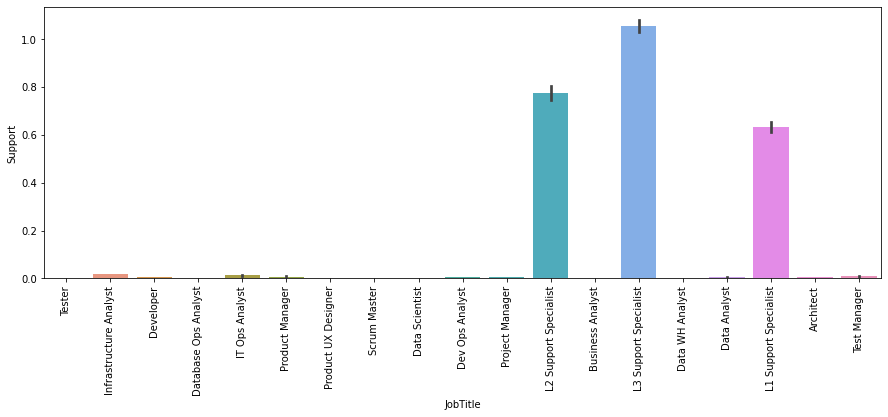

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(x= "JobTitle", y="Support", data=df2);

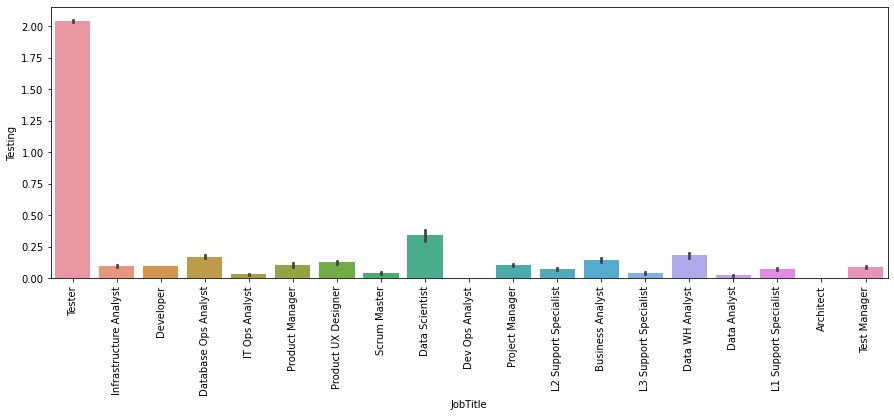

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(x= "JobTitle", y="Testing", data=df2);

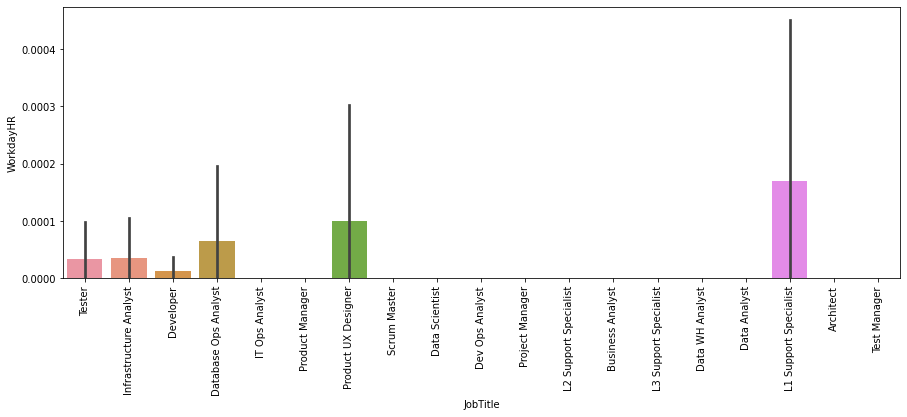

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(x= "JobTitle", y="WorkdayHR", data=df2);

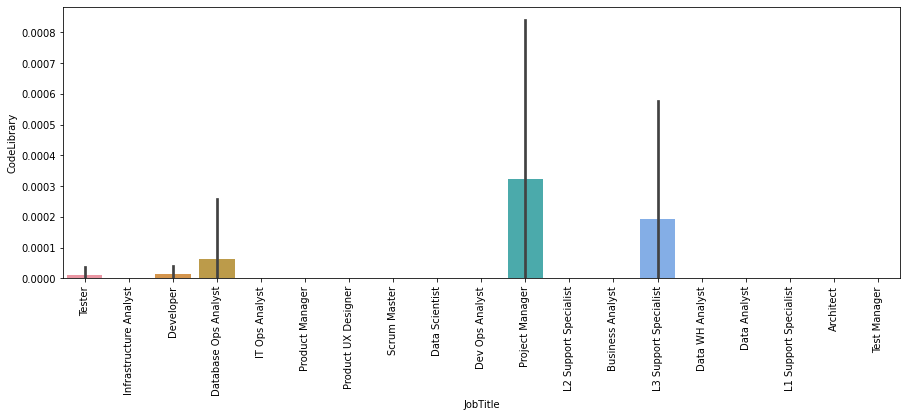

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(x= "JobTitle", y="CodeLibrary", data=df2);

As we can see the above graphs, these 4 columns are specifically related columns for the JobTitles. When I check the correlation like the Tester and TestingHour after get dummies, it was almost 0.7. So, for our project these 4 column can be less important.

# Kedar: Outliers and other issues:

In [ ]:
!pip install dataprep 
from dataprep.eda import *
from dataprep.eda import plot, plot_correlation, plot_missing, plot_diff, create_report

     |████████████████████████████████| 9.5 MB 4.3 MB/s 
  Using cached regex-2021.11.10-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (749 kB)
  Using cached python-Levenshtein-0.12.2.tar.gz (50 kB)
     |████████████████████████████████| 965 kB 73.2 MB/s 
     |████████████████████████████████| 366 kB 71.2 MB/s 
  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
  Using cached pystache-0.6.0.tar.gz (78 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 66.4 MB/s 
  Using cached Flask-2.1.1-py3-none-any.whl (95 kB)
  Using cached Flask_Cors-3.0.10-py2.py3-none-any.whl (14 kB)
  Using cached Metaphone-0.6.tar.gz (14 kB)
  Using cached pydantic-1.9.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
  Using cached varname-0.8.3-py3-none-any.whl (21 kB)
     |████████████████████████████████| 132 kB 71.9 MB/s 
  Using cached aiohttp-3.

In [ ]:
df2.info()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2,7,figsize = (25,10))

sns.histplot(data = df2,x ='TotalTime',ax = axs[0,0])
sns.histplot(data = df2,x ='WorkTime',ax = axs[0,1] )
sns.histplot(data = df2,x ='Unaccounted',ax = axs[0,2] )
sns.histplot(data = df2,x = 'Private',ax = axs[0,3])
sns.histplot(data = df2,x = 'Communication',ax = axs[0,4])
sns.histplot(data = df2,x = 'Development',ax = axs[0,5])
sns.histplot(data = df2,x = 'Documentation',ax = axs[0,6] )
sns.histplot(data = df2,x = 'Meetings',ax = axs[1,0] )
sns.histplot(data = df2,x = 'Support',ax = axs[1,1])
sns.histplot(data = df2,x = 'Utilities',ax = axs[1,2])
sns.histplot(data = df2,x = 'Testing',ax = axs[1,3])
sns.histplot(data = df2,x = 'WorkdayHR',ax = axs[1,4])
sns.histplot(data = df2,x = 'CodeLibrary',ax = axs[1,5])
fig.suptitle("Histograms")
plt.tight_layout()
plt.show()

In [ ]:
Q1 = df2[['WorkTime']].quantile(0.25)
Q3 = df2[['WorkTime']].quantile(0.75)
IQR = Q3 - Q1

((df2[['WorkTime']] < (Q1 - 1.5 * IQR)) | (df2[['WorkTime']] > (Q3 + 1.5 * IQR))).sum()

93 outliers in WorkTime using the IQR method

In [ ]:
df2.nunique(axis = 0)

In [ ]:
pd.unique(df2['JobTitle'])

In [ ]:
plot_correlation(df2)

# Rhys Utilization 

In [ ]:
df2.select_dtypes(include='float64').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312765 entries, 0 to 313942
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TotalTime      312765 non-null  float64
 1   WorkTime       312765 non-null  float64
 2   Unaccounted    312765 non-null  float64
 3   Private        312765 non-null  float64
 4   Communication  312765 non-null  float64
 5   Development    312765 non-null  float64
 6   Documentation  312765 non-null  float64
 7   Meetings       312765 non-null  float64
 8   Support        312765 non-null  float64
 9   Utilities      312765 non-null  float64
 10  Testing        312765 non-null  float64
 11  WorkdayHR      312765 non-null  float64
 12  CodeLibrary    312765 non-null  float64
 13  Utilization    312765 non-null  float64
dtypes: float64(14)
memory usage: 43.9 MB


In [ ]:
df2.select_dtypes(include='float64').head()

TotalTime  WorkTime  Unaccounted  Private  Communication  Development  \
0       8.08      3.73         3.43     0.92           1.17          0.0   
1       9.07      2.77         5.40     0.90           1.22          0.0   
2       8.52      2.30         5.20     1.02           1.13          0.0   
3       8.60      2.31         5.31     0.98           1.13          0.0   
4       9.13      2.73         5.48     0.92           1.19          0.0   

   Documentation  Meetings  Support  Utilities  Testing  WorkdayHR  \
0            0.2      0.18      0.0       0.13     2.05        0.0   
1            0.2      0.17      0.0       0.13     1.05        0.0   
2            0.0      0.00      0.0       0.00     1.17        0.0   
3            0.0      0.00      0.0       0.13     1.05        0.0   
4            0.2      0.18      0.0       0.13     1.03        0.0   

   CodeLibrary  Utilization  
0          0.0         0.47  
1          0.0         0.35  
2          0.0         0.29  
3          0.0         0.29  
4          0.0         0.34

There is at least one outlier. 

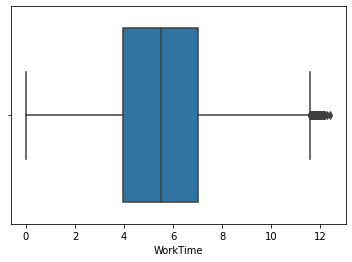

In [ ]:
sns.boxplot(x=df2['WorkTime'])
plt.show()

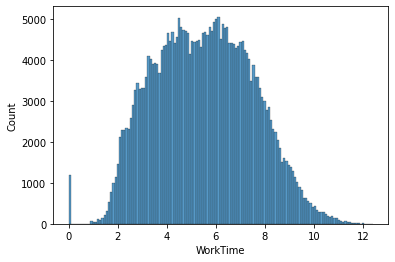

In [ ]:
sns.histplot(df2['WorkTime'])

In [ ]:
from scipy.stats import zscore

score = zscore(df2['WorkTime'])

score = np.abs(score)

df2.iloc[(score > 3),].sort_values(by='WorkTime',ascending = False).select_dtypes(include='float64').head()

TotalTime  WorkTime  Unaccounted  Private  Communication  Development  \
109329      12.95     12.41         0.08     0.46           3.05         5.01   
127643      12.72     12.26         0.46     0.00           3.30         4.12   
278303      12.87     12.21         0.57     0.09           4.07         0.00   
127622      12.68     12.16         0.52     0.00           2.80         4.35   
127634      12.70     12.15         0.55     0.00           3.25         4.16   

        Documentation  Meetings  Support  Utilities  Testing  WorkdayHR  \
109329           2.81      0.72     0.18       0.64     0.00        0.0   
127643           0.45      0.26     0.00       1.47     2.66        0.0   
278303           1.47      0.78     0.00       0.07     5.82        0.0   
127622           0.46      0.24     0.00       1.75     2.56        0.0   
127634           0.46      0.26     0.00       1.65     2.37        0.0   

        CodeLibrary  Utilization  
109329          0.0         1.55  
127643          0.0         1.53  
278303          0.0         1.53  
127622          0.0         1.52  
127634          0.0         1.52

In [ ]:
print(f'There are {(score > 3).sum()} outliers ({round((score > 3).sum()/df.shape[0],4)}%)')

There are 102 outliers (0.0001%)


# Evaluate Correlations - Wenbo

In [ ]:
df2["utilization%"] = df2["WorkTime"] / df2["TotalTime"]

In [ ]:
df2.select_dtypes(include='float64').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312765 entries, 0 to 313942
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TotalTime      312765 non-null  float64
 1   WorkTime       312765 non-null  float64
 2   Unaccounted    312765 non-null  float64
 3   Private        312765 non-null  float64
 4   Communication  312765 non-null  float64
 5   Development    312765 non-null  float64
 6   Documentation  312765 non-null  float64
 7   Meetings       312765 non-null  float64
 8   Support        312765 non-null  float64
 9   Utilities      312765 non-null  float64
 10  Testing        312765 non-null  float64
 11  WorkdayHR      312765 non-null  float64
 12  CodeLibrary    312765 non-null  float64
 13  Utilization    312765 non-null  float64
 14  utilization%   312759 non-null  float64
dtypes: float64(15)
memory usage: 46.2 MB


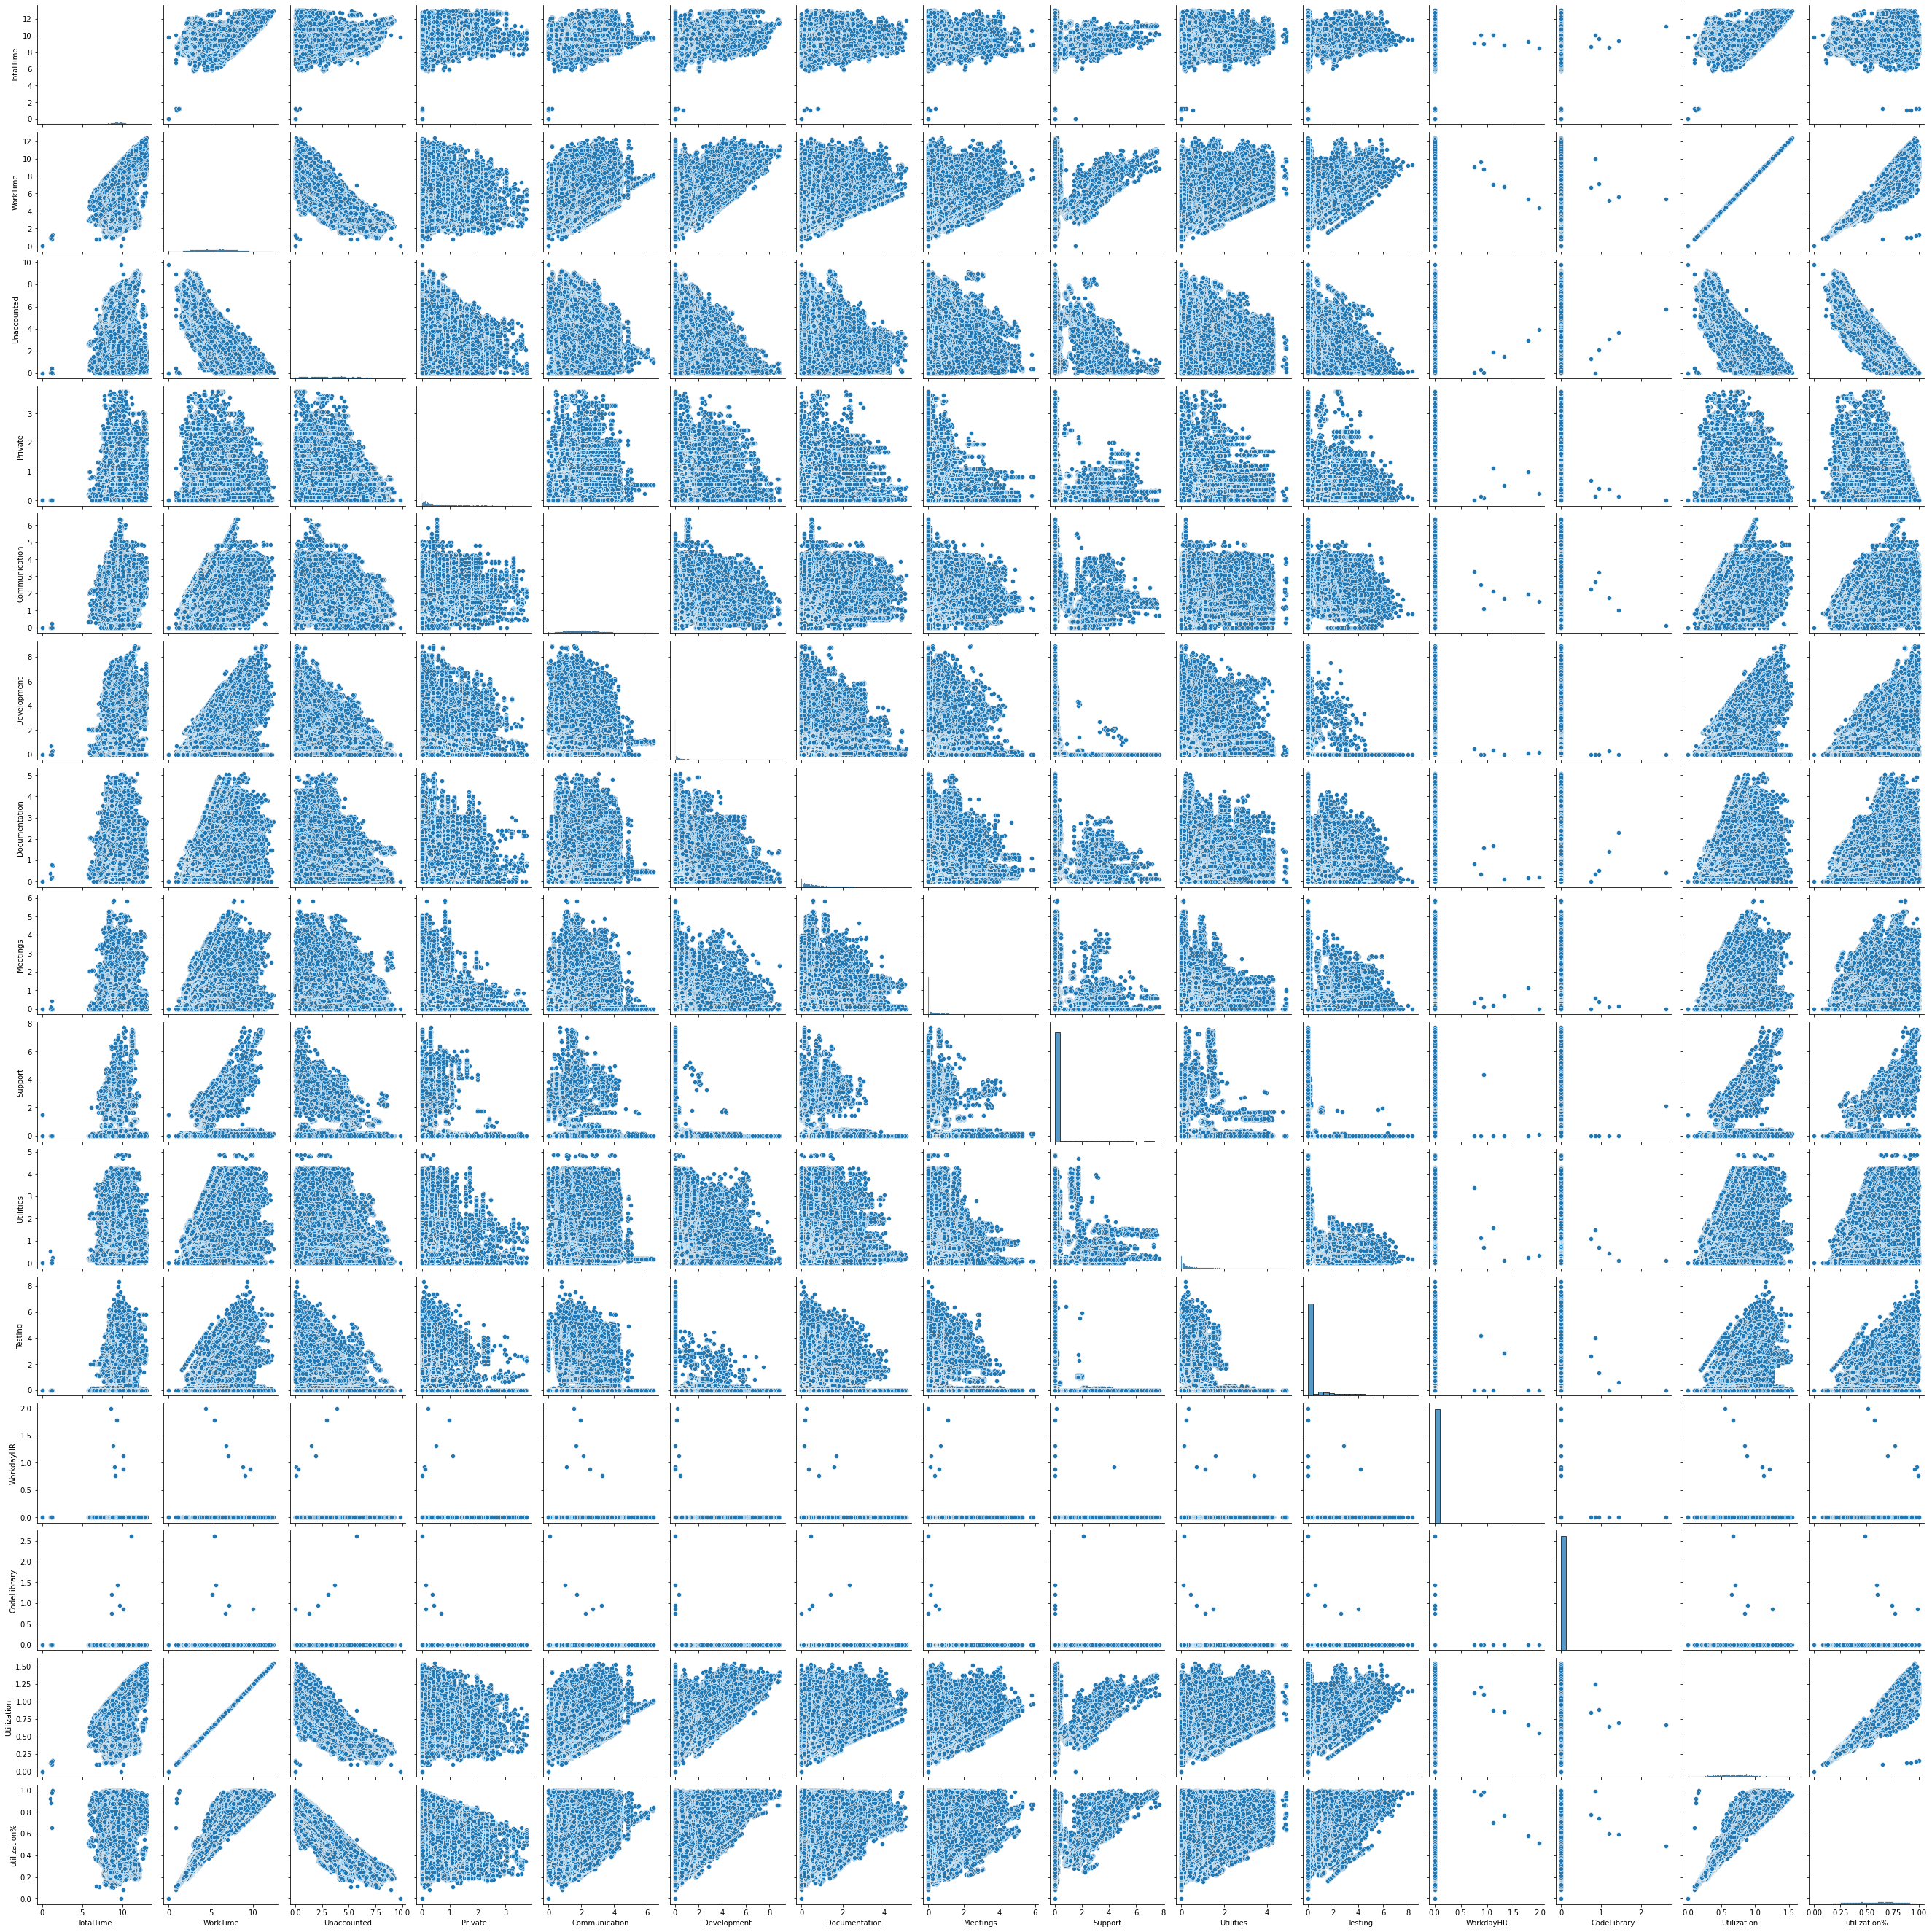

In [ ]:
sns.pairplot(df2.select_dtypes(include='float64'))

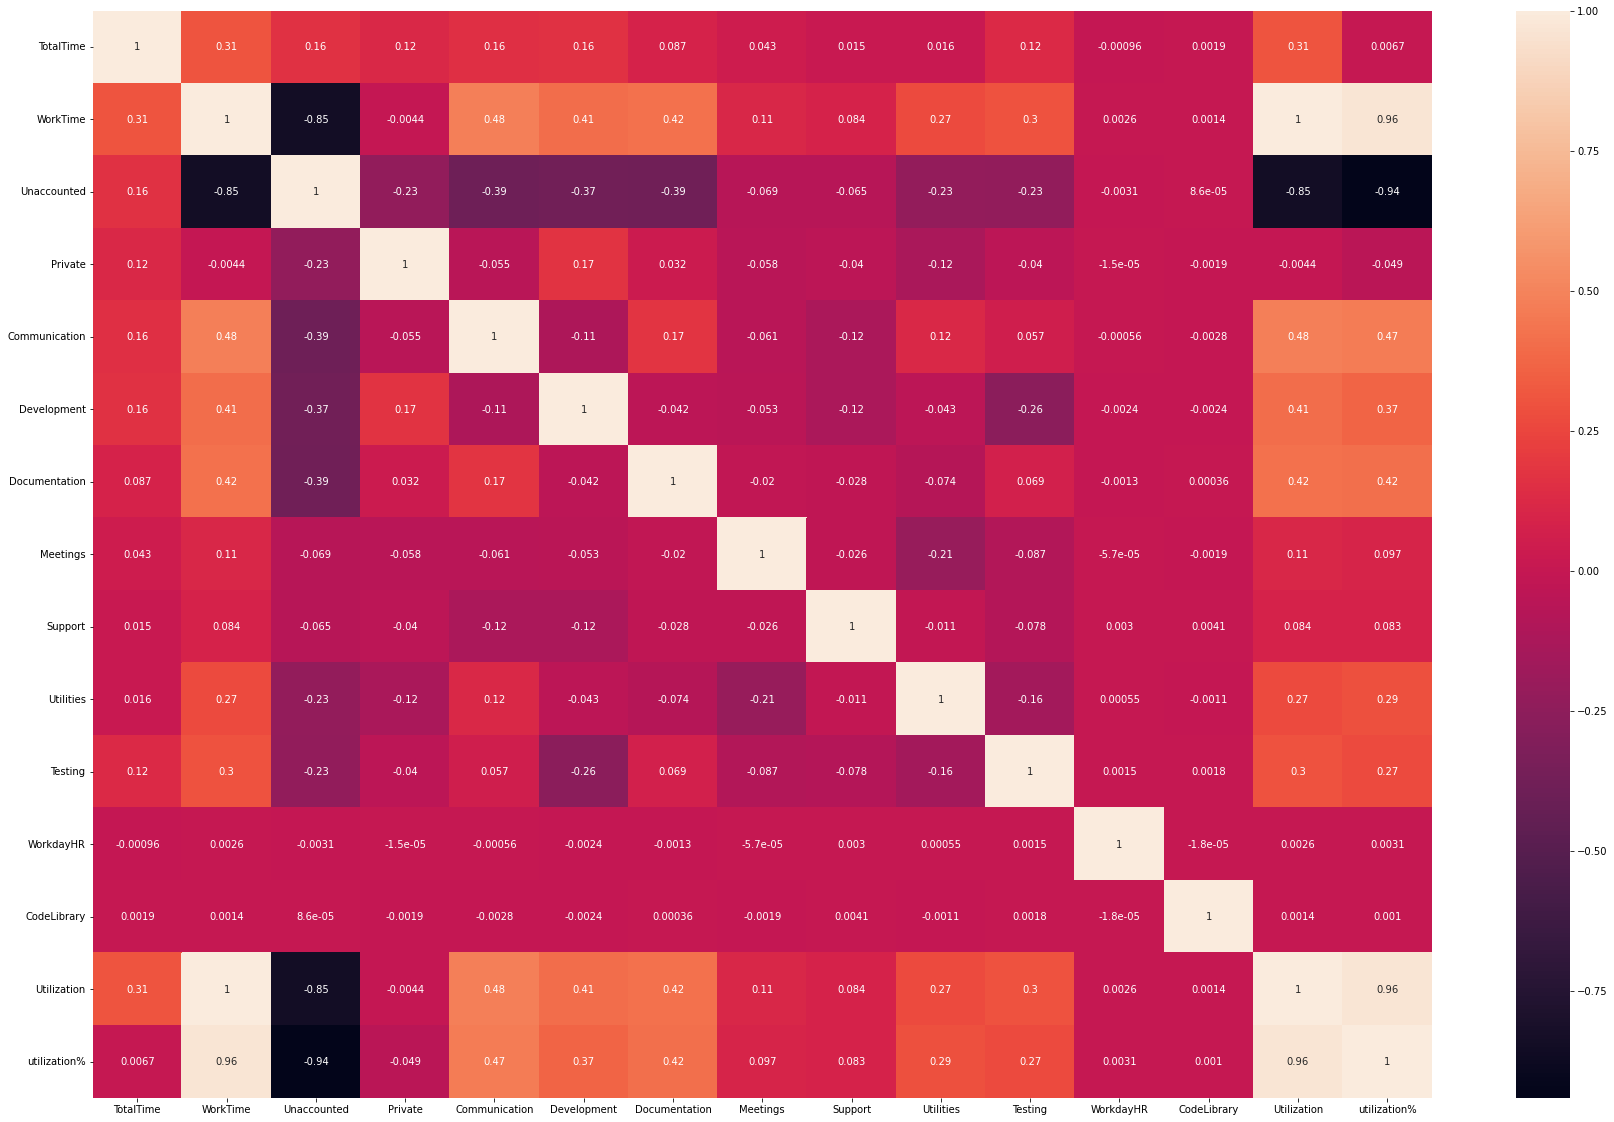

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(df2.select_dtypes(include='float64').corr(), annot = True)
sns.set(font_scale = 1.7)

1. As expected, utilization % is positively correlated with work time, communication, development, documentation and testing etc, and is negatively correlated with private time and unaccounted time;
2. Development has negative correlations with communication (-0.11), testing (-0.26) and unaccounted time (-0.37);
3. Communication has a positive correlation with documentation (0.17);
4. Support has negative correlations with communication (-0.12) and development (-0.12)

# Summary of Data Cleaning Steps:

- All Columns in CamelCase
- 'Date', 'StartTime', 'EndTime' converted to datetime
- 'WorkTime' - one very large value fixed using work time formula (Work Time = Communication +	Development	+ Documentation	+ Meetings + Support + Utilities + Testing)
- Utilization column:
  - Divide by 8 (make global worktime variable)
  - Divide by total time (Work Time + Unaccounted + Private)
- 'Unaccounted': one negative value (-0.02) changed to '0'
- There are 1179 rows that have zero values in the numeric values columns. Also when I check the Start Time and End Time values, 1178 of those start time and end time are same 0:00:00 . So we can think to drop these values.
 - Drop [Y/n?]: Y
- Columns with majority zeroes:
  - Support (0.93): Lower number of employees that need to log 'Support' hours
    - Drop [Y/n?]: n
  - Testing (0.79): Lower number of employees that need to log 'Testing' hours
    - Drop [Y/n?]: n
  - WorkdayHR(0.99):
    - Drop [Y/n?]: n
  - CodeLibrary(0.99)
    - Drop [Y/n?]: n
  - EmailID/emailaddress: redundant info?
    - Drop [Y/n?]: n

### Ayya: Remaining EDA Tasks (Data types, dropping redundant/meaningless columns)


- The columns EmailID/ emailaddress have duplicate entries except for 1192 mismatched emails - which looks like invalid information. It is better to drop one of the columns. 

In [ ]:

df2.info()